In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf

# Importing necessary classes for building a neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Importing MinMaxScaler for feature scaling from Scikit-learn
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [4]:
# Loading the Stock Data of NVIDIA Corp. & AMD Inc.

company1 = 'NVDA'
company2 = 'AMD'

start_time = '2014-01-01'
end_time = '2023-12-31'

nvda_data = yf.download(company1, start=start_time, end=end_time)
amd_data = yf.download(company2, start=start_time, end=end_time)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Scaling Closing Data of stocks to range between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_nvda_data = scaler.fit_transform(nvda_data['Close'].values.reshape(-1,1))
scaled_amd_data = scaler.fit_transform(amd_data['Close'].values.reshape(-1,1))

prediction_days = 90    # how many past days model will use to predict stock change

# Storing past {predcition_days}'s data in training set
x_train_nvda = []
y_train_nvda = []
x_train_amd = []
y_train_amd = []

for x in range(prediction_days, len(scaled_nvda_data)):
    x_train_nvda.append(scaled_nvda_data[x-prediction_days:x, 0])
    y_train_nvda.append(scaled_nvda_data[x, 0])

for x in range(prediction_days, len(scaled_amd_data)):
    x_train_amd.append(scaled_amd_data[x-prediction_days:x, 0])
    y_train_amd.append(scaled_amd_data[x, 0])

# Converting training data into numpy array
x_train_nvda, y_train_nvda = np.array(x_train_nvda), np.array(y_train_nvda)
x_train_amd, y_train_amd = np.array(x_train_amd), np.array(y_train_amd)
x_train_nvda = np.reshape(x_train_nvda, (x_train_nvda.shape[0], x_train_nvda.shape[1], 1))
x_train_amd = np.reshape(x_train_amd, (x_train_amd.shape[0], x_train_amd.shape[1], 1))

In [7]:
# Building the Model for NVDA

model1 = Sequential()

model1.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_nvda.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50))
model1.add(Dropout(0.2))
model1.add(Dense(units=1))

model1.compile(optimizer='adam', loss='mean_squared_error')
model1.fit(x_train_nvda, y_train_nvda, epochs=25, batch_size=32)

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.0167
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0017
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0018
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0013
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.0018
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0012
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0016
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0015
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0017
Epoch 10/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.0012
Epoch 11/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0013
Epoch 12/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0011
Epoch 13/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0011
Epoch 14/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0010
Epoch 15/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.0011
Epo

In [8]:
# Building the Model for AMD

model2 = Sequential()

model2.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_amd.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))

model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(x_train_amd, y_train_amd, epochs=25, batch_size=32)

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - loss: 0.0258
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.0026
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0024
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0024
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0022
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0021
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0020
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0017
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0019
Epoch 10/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0016
Epoch 11/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0016
Epoch 12/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0019
Epoch 13/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0015
Epoch 14/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0015
Epoch 15/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0014
Ep

In [9]:
# Testing the model accuracy on existing data of stock

# Loading Test Data
test_start = '2024-01-01'
test_end = '2024-12-31'

test_nvda_data = yf.download(company1, start=test_start, end=test_end)
test_amd_data = yf.download(company2, start=test_start, end=test_end)

real_nvda_prices = test_nvda_data['Close'].values
total_nvda_dataset = pd.concat((nvda_data['Close'], test_nvda_data['Close']), axis=0)
nvda_model_inputs = total_nvda_dataset[len(total_nvda_dataset) - len(test_nvda_data) - prediction_days:].values
nvda_model_inputs = nvda_model_inputs.reshape(-1,1)
nvda_model_inputs = scaler.transform(nvda_model_inputs)

real_amd_prices = test_amd_data['Close'].values
total_amd_dataset = pd.concat((amd_data['Close'], test_amd_data['Close']), axis=0)
amd_model_inputs = total_amd_dataset[len(total_amd_dataset) - len(test_amd_data) - prediction_days:].values
amd_model_inputs = amd_model_inputs.reshape(-1,1)
amd_model_inputs = scaler.transform(amd_model_inputs)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
# Making Predictions on Test Data

x_test_nvda = []
x_test_amd = []

for x in range(prediction_days, len(nvda_model_inputs)):
    x_test_nvda.append(nvda_model_inputs[x-prediction_days:x, 0])
    
for x in range(prediction_days, len(amd_model_inputs)):
    x_test_amd.append(amd_model_inputs[x-prediction_days:x, 0])

x_test_nvda = np.array(x_test_nvda)
x_test_nvda = np.reshape(x_test_nvda, (x_test_nvda.shape[0], x_test_nvda.shape[1], 1))
x_test_amd = np.array(x_test_amd)
x_test_amd = np.reshape(x_test_amd, (x_test_amd.shape[0], x_test_amd.shape[1], 1))

nvda_prediction_prices = model1.predict(x_test_nvda)
nvda_prediction_prices = scaler.inverse_transform(nvda_prediction_prices)
amd_prediction_prices = model2.predict(x_test_amd)
amd_prediction_prices = scaler.inverse_transform(amd_prediction_prices)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


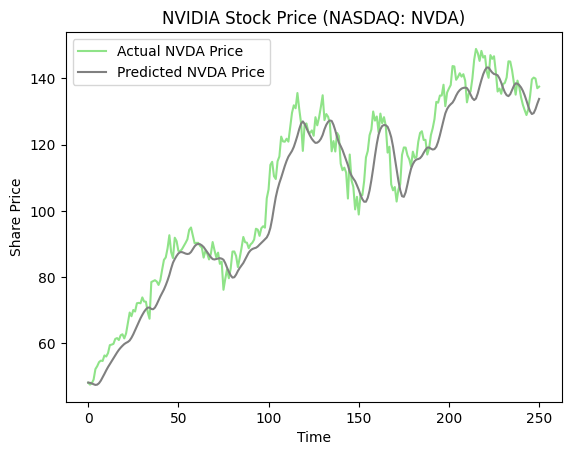

In [11]:
# Visualizing the NVDA's Model Predictions

plt.plot(real_nvda_prices, color='#8fe388', label='Actual NVDA Price')
plt.plot(nvda_prediction_prices, color='grey', label='Predicted NVDA Price')
plt.title("NVIDIA Stock Price (NASDAQ: NVDA)")
plt.xlabel("Time")
plt.ylabel("Share Price")
plt.legend()
plt.savefig('visualizations/nvidia_year_prediction.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

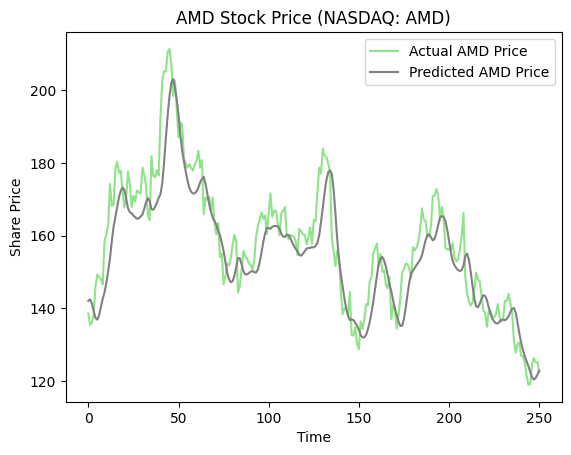

In [12]:
# Visualizing the AMD's Model Predictions

plt.plot(real_amd_prices, color='#8fe388', label='Actual AMD Price')
plt.plot(amd_prediction_prices, color='grey', label='Predicted AMD Price')
plt.title("AMD Stock Price (NASDAQ: AMD)")
plt.xlabel("Time")
plt.ylabel("Share Price")
plt.legend()
plt.savefig('visualizations/amd_year_prediction.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

In [13]:
# Predicting price of stocks in future (1 day)

current_nvda_data = [nvda_model_inputs[len(nvda_model_inputs) + 1 - prediction_days:len(nvda_model_inputs+1), 0]]
current_nvda_data = np.array(current_nvda_data)
current_nvda_data = np.reshape(current_nvda_data, (current_nvda_data.shape[0], current_nvda_data.shape[1], 1))

current_amd_data = [amd_model_inputs[len(amd_model_inputs) + 1 - prediction_days:len(amd_model_inputs+1), 0]]
current_amd_data = np.array(current_amd_data)
current_amd_data = np.reshape(current_amd_data, (current_amd_data.shape[0], current_amd_data.shape[1], 1))

In [15]:
nvda_future_prediction = model1.predict(current_nvda_data)
nvda_future_prediction = scaler.inverse_transform(nvda_future_prediction)

amd_future_prediction = model2.predict(current_amd_data)
amd_future_prediction = scaler.inverse_transform(amd_future_prediction)

print(f'NVIDIA Prediction: {nvda_future_prediction}')
print(f'AMD Prediction: {amd_future_prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
NVIDIA Prediction: [[134.85405]]
AMD Prediction: [[123.58671]]
